# Importing libraries and modules

In [1]:
import epidemic
import centrality
import score
import networkx as nx
import matplotlib.pyplot as plt

# Setting parameters

In [37]:
ba_network = nx.barabasi_albert_graph(3000, 2) # Network
beta = 0.1 # Infection rate
initial_infected_count = 1 # Number of initial infected nodes
max_iterations = None # Stop simulation after this number of time steps (if None, ignore)
max_infected_frac = 0.6 # Stop simulation when this fraction of nodes is infected (if None, ignore)

# Running epidemic and getting infected nodes

In [38]:
infected = epidemic.si_epidemic(ba_network, beta, initial_infected_count, max_iterations, max_infected_frac)

# Defining observed infected nodes

In [39]:
observed = epidemic.observed_infected(infected, 0.75)

# Computing network centrality measures

In [40]:
obs_betw = centrality.observed_betweenness(ba_network, observed)
betw = centrality.betweenness(ba_network)
cont = centrality.contact(ba_network, observed)
degr = centrality.degree(ba_network)

# Computing AUC scores for each centrality measure

In [44]:
score_obs_betw = score.auc_score(infected, obs_betw)
score_betw = score.auc_score(infected, betw)
score_cont = score.auc_score(infected, cont)
score_degr = score.auc_score(infected, degr)

score_obs_betw[0], score_betw[0], score_cont[0], score_degr[0]

(np.float64(0.7290166666666666),
 np.float64(0.6668935185185185),
 np.float64(0.6409115740740741),
 np.float64(0.6312300925925927))

# Plotting ROC curves for each centrality measure

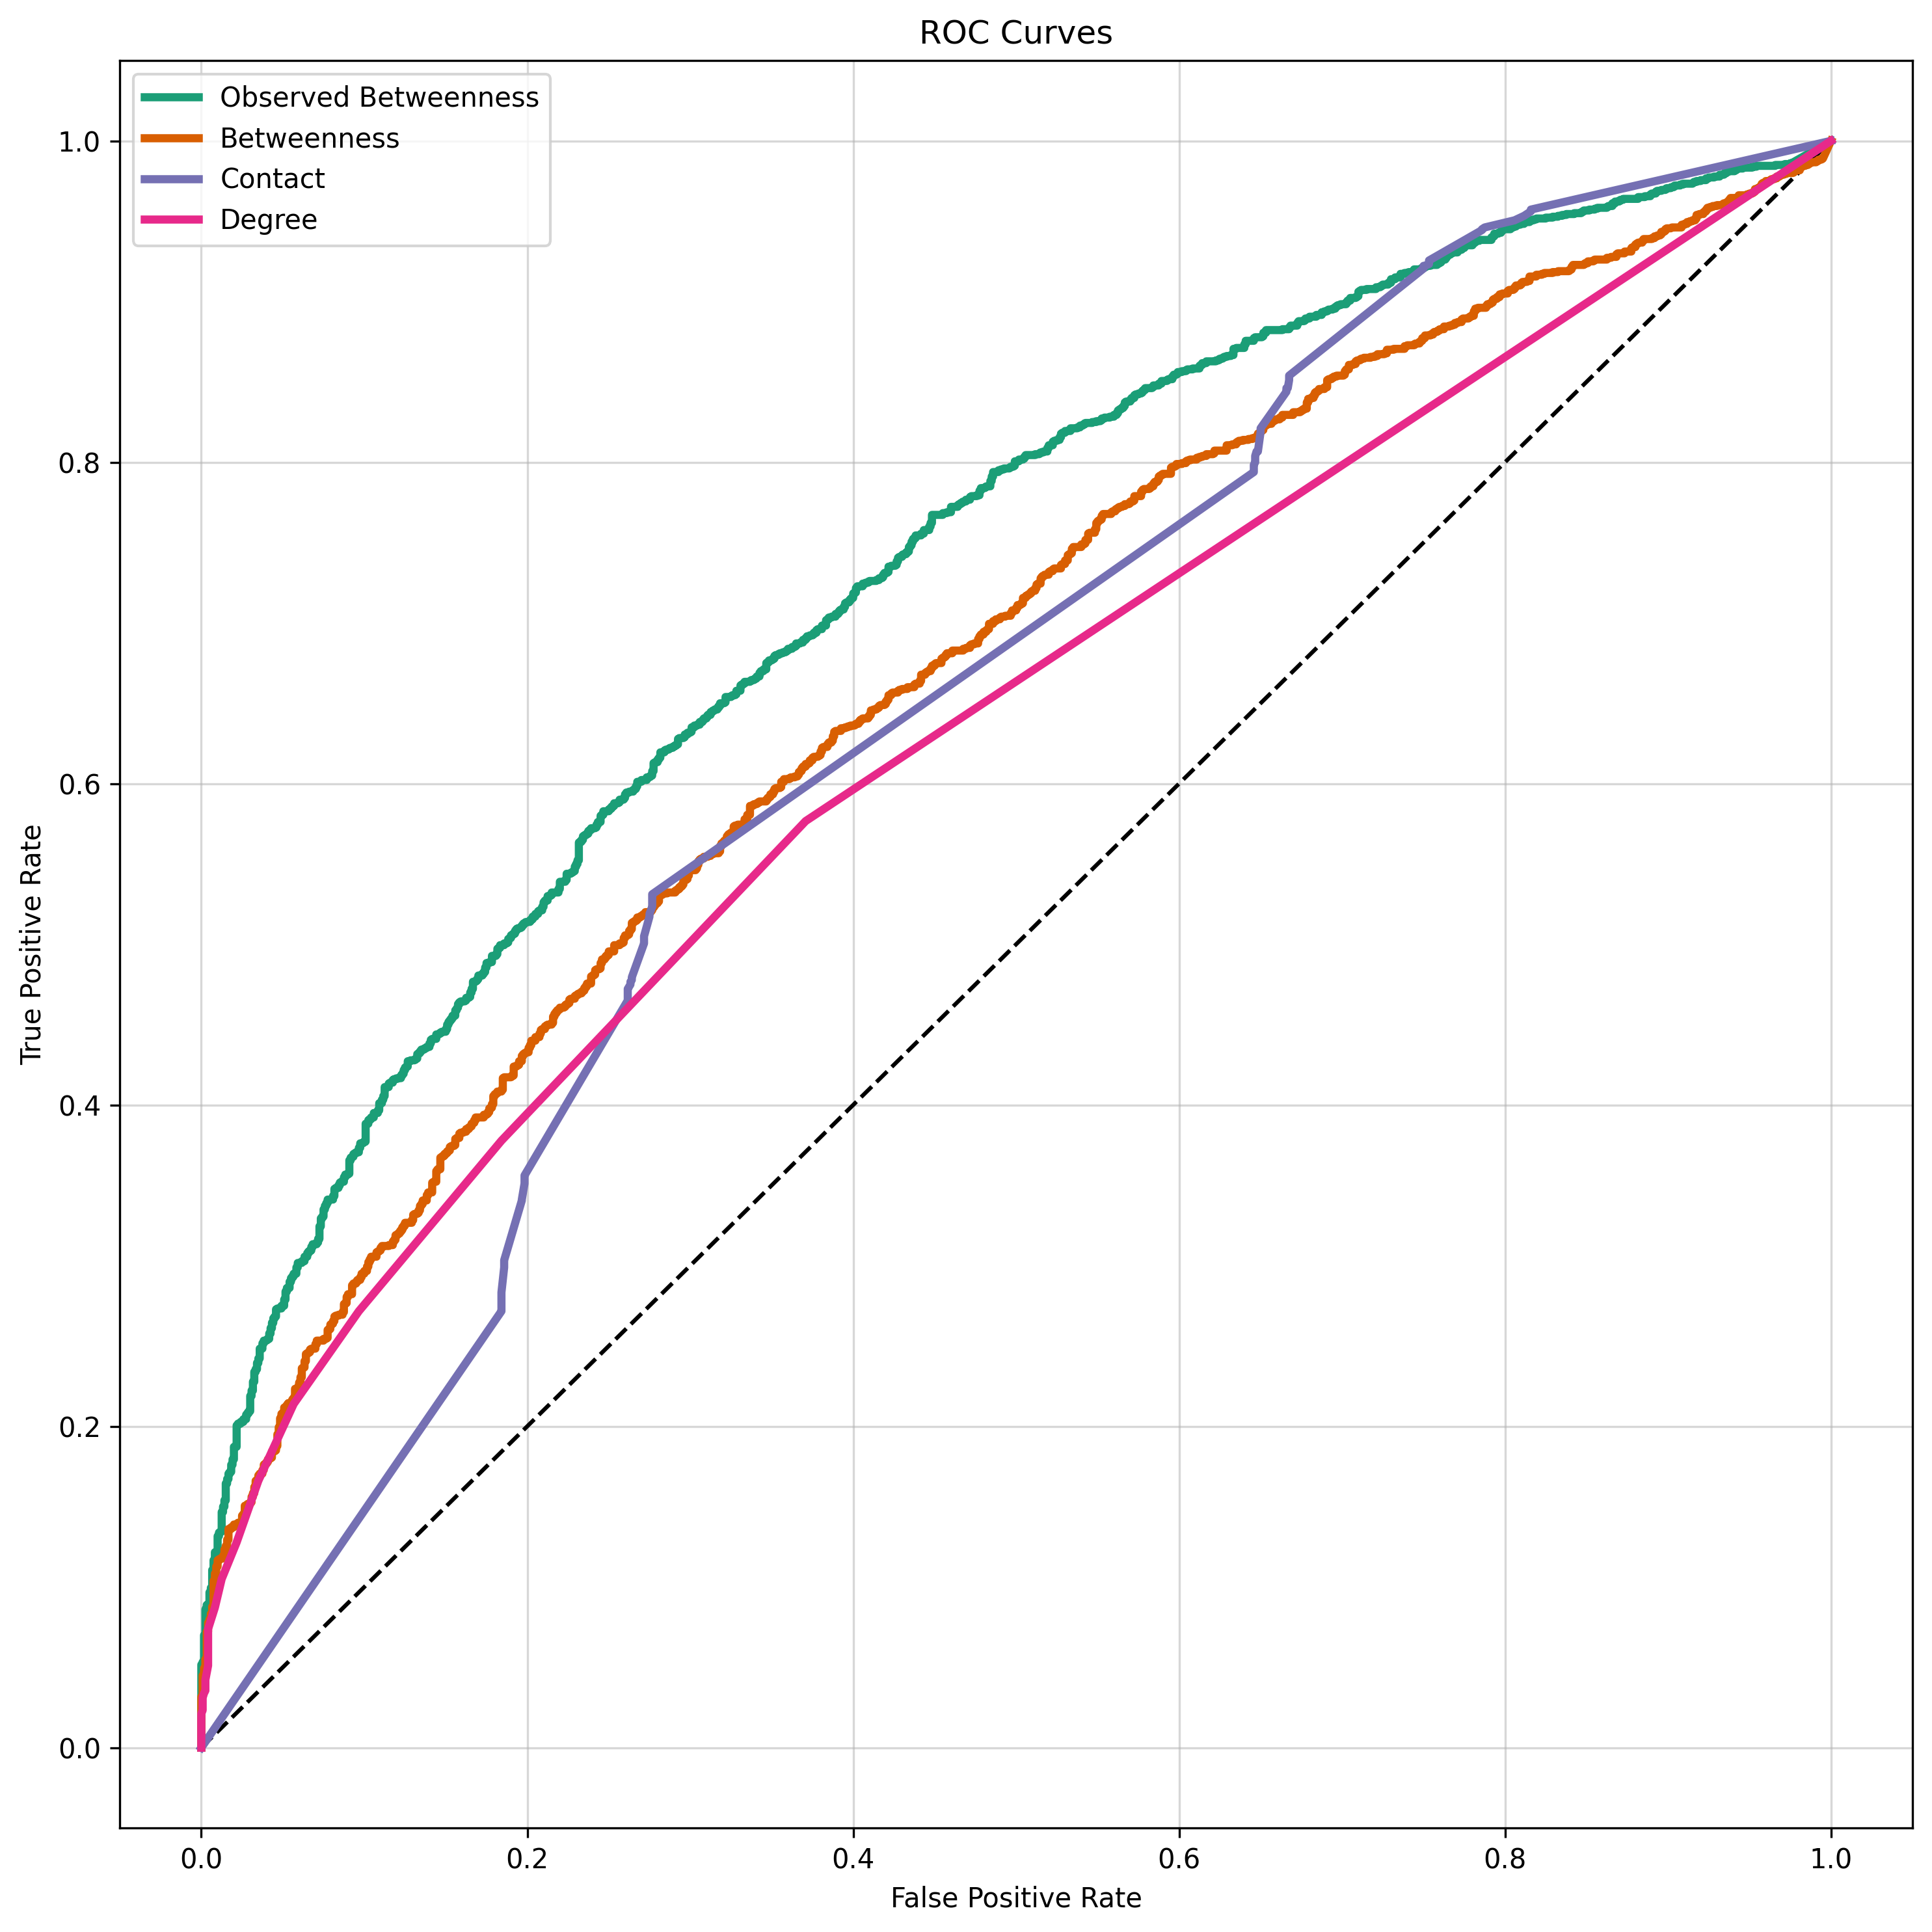

In [43]:
fig = plt.figure(figsize=(10,10), dpi=300)
cmap = plt.get_cmap("Dark2")

plt.plot([0,1], [0,1], 'k--')
plt.plot(score_obs_betw[1][0], score_obs_betw[1][1], color=cmap(0), label="Observed Betweenness", linewidth=3)
plt.plot(score_betw[1][0], score_betw[1][1], color=cmap(1), label="Betweenness", linewidth=3)
plt.plot(score_cont[1][0], score_cont[1][1], color=cmap(2), label="Contact", linewidth=3)
plt.plot(score_degr[1][0], score_degr[1][1], color=cmap(3), label="Degree", linewidth=3)

plt.grid(alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="best")
plt.tight_layout()
plt.show()